<a href="https://colab.research.google.com/github/saimedha12/ICP_3/blob/main/ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Q1 Compare models with 5, 7, 9 Dense layers (using diabetes.csv)

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# Load dataset (fix headers issue)
# -----------------------------
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

data = pd.read_csv("diabetes.csv", header=None, names=columns)

# Features and labels
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Helper: Build model with n Dense layers
# -----------------------------
def build_model(num_layers):
    model = Sequential()
    from tensorflow.keras import Input
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    for _ in range(num_layers - 1):   # add extra hidden layers
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# Train models with 5, 7, 9 layers
# -----------------------------
layers_to_test = [5, 7, 9]
results = {}

for num in layers_to_test:
    print(f"\n🔹 Training model with {num} Dense layers...")
    model = build_model(num)
    history = model.fit(
        X_train, y_train,
        epochs=30, batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0
    )
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results[num] = acc

# -----------------------------
# Print final results
# -----------------------------
print("\n Results (Diabetes dataset):")
for num, acc in results.items():
    print(f"   Layers = {num} → Accuracy = {acc:.4f}")



🔹 Training model with 5 Dense layers...

🔹 Training model with 7 Dense layers...

🔹 Training model with 9 Dense layers...

 Results (Diabetes dataset):
   Layers = 5 → Accuracy = 0.7013
   Layers = 7 → Accuracy = 0.7338
   Layers = 9 → Accuracy = 0.6948


In [23]:
#Q2  Train model on Breast Cancer dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files

# -----------------------------
# Upload the dataset
# -----------------------------
uploaded = files.upload()   # select breastcancer.csv from your computer

# Load data
data = pd.read_csv("breastcancer.csv")

# -----------------------------
# Preprocess
# -----------------------------
# Map diagnosis column: M → 1, B → 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Features and labels
X = data.drop(["id", "diagnosis"], axis=1, errors="ignore").values
y = data["diagnosis"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Build model (simple version)
# -----------------------------
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train and Evaluate
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=30, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Breast Cancer Model Accuracy = {acc:.4f}")


Saving breastcancer.csv to breastcancer (1).csv
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5908 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6503 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6733 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6406 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6265 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6285 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6325 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6398 - loss: nan - val_accuracy: 0.6316 - val_loss: nan
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

In [24]:
#Q3 Effect of Normalization on Model Performance

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# --------------------------
# Load dataset
# --------------------------
data = load_breast_cancer()
X, y = data.data, data.target

# Replace any NaN/Inf with 0
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# Function to build model
# --------------------------
def build_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation="relu"),   # Modified dense layer
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# --------------------------
# 1. Without Normalization
# --------------------------
model_no_norm = build_model(X_train.shape[1])
history_no_norm = model_no_norm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30, batch_size=32, verbose=0
)

loss_no, acc_no = model_no_norm.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy without normalization: {acc_no:.4f}")

# --------------------------
# 2. With Normalization
# --------------------------
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Replace again in case of div/0
X_train_norm = np.nan_to_num(X_train_norm)
X_test_norm = np.nan_to_num(X_test_norm)

model_norm = build_model(X_train_norm.shape[1])
history_norm = model_norm.fit(
    X_train_norm, y_train,
    validation_data=(X_test_norm, y_test),
    epochs=30, batch_size=32, verbose=0
)

loss_norm, acc_norm = model_norm.evaluate(X_test_norm, y_test, verbose=0)
print(f"Accuracy with normalization: {acc_norm:.4f}")


Accuracy without normalization: 0.9649
Accuracy with normalization: 0.9737


In [25]:
#Q4 Using Callbacks

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Load and preprocess data
data = pd.read_csv("breastcancer.csv")

if 'id' in data.columns:
    data = data.drop(['id'], axis=1)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

callbacks = [early_stop, checkpoint, reduce_lr]

# Train model (suppress detailed output)
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=callbacks,
                    verbose=1)  # Suppress training logs

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy with Callbacks: {acc:.4f}")
print(f"Final Test Loss: {loss:.4f}")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6372 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6419 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6417 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6335 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 2.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6358 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 2.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6142 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 2.0000e-04
Accuracy with Callbacks: 0.6228
Final Test Loss: nan


Q5: Explanation of Callbacks

1. EarlyStopping: Stops training when the validation loss stops improving to prevent overfitting.

2. ModelCheckpoint: Saves the best model during training, ensuring the best weights are preserved.

3. ReduceLROnPlateau: Reduces the learning rate when the validation loss plateaus, helping the model escape local minima and improve convergence.








Epoch 1/50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6203 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6211 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6340 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6118 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 2.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6078 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 2.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6155 - loss: nan - val_accuracy: 0.6228 - val_loss: nan - learning_rate: 2.0000e-04
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6167 - loss: nan - val_accuracy: 0.6228 - val_loss: nan
Epoch 2/50
15

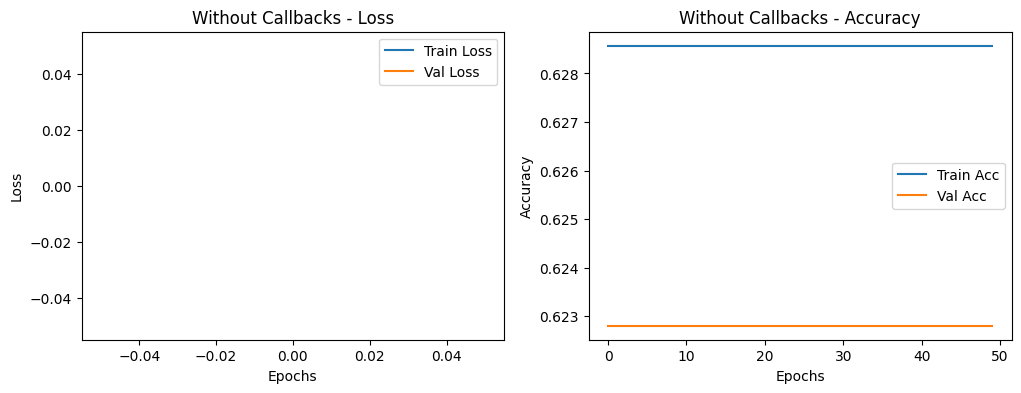

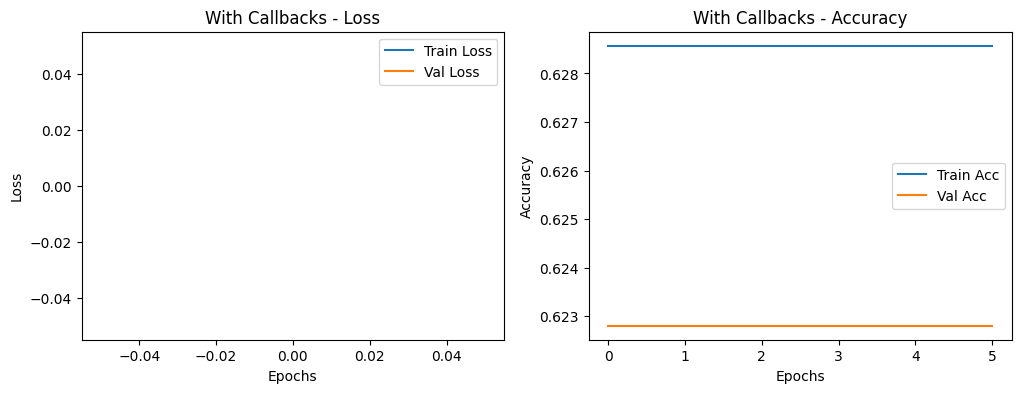

In [26]:
# Q6: Compare training curves with and without callbacks


import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess data (assuming breastcancer.csv is available)
data = pd.read_csv("breastcancer.csv")

if 'id' in data.columns:
    data = data.drop(['id'], axis=1)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model function
def build_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Callbacks for training with callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
callbacks = [early_stop, checkpoint, reduce_lr]

# Train model with callbacks
model_cb = build_model()
history_cb = model_cb.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Train model without callbacks
model_no_cb = build_model()
history_no_cb = model_no_cb.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32,
    verbose=1
)

# Plot function
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(title + " - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(title + " - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

# Plot results
plot_history(history_no_cb, "Without Callbacks")
plot_history(history_cb, "With Callbacks")


https://youtu.be/yRj0k4Tyc9M